#Importar os dados


In [ ]:
#bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#componentes do Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Ler dataset
df = pd.read_csv('Titanic-Dataset.csv')

#imprimir informações iniciais
print(df.head())
print("\nInformações do DataFrame:")
df.info()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

I

#Tratamento dos dados

In [2]:
# --- Tratamento de Dados Faltantes ---

# Idade (Age): Preencher com a mediana, que é menos sensível a outliers
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarque (Embarked): Preencher com a moda (o valor mais comum)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Cabine (Cabin): Possui muitos valores nulos. Logo foi removida
df.drop('Cabin', axis=1, inplace=True)

# Verificar se ainda há dados nulos
print("\nDados nulos após tratamento:")
print(df.isnull().sum())


# --- Engenharia e Seleção de Features ---

# Remover colunas que não agregam valor preditivo para um modelo simples
# Name e Ticket são muito únicos, PassengerId é apenas um identificador
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


# --- Preparação para o Modelo ---

# 1. Definir as features (X) e o alvo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# 2. Identificar colunas categóricas e numéricas
categorical_features = ['Pclass', 'Sex', 'Embarked']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

# 3. Criar um pipeline de pré-processamento
#    - Para dados numéricos: Padronização (coloca na mesma escala)
#    - Para dados categóricos: One-Hot Encoding (transforma em colunas binárias)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 4. Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Dados nulos após tratamento:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-4265015676.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-4265015676.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

#Treinamento dos modelos de Regressão Logistica e Random Forest


In [3]:
#Modelo 1: Regressão Logística

# Criar o pipeline com o pré-processador e o classificador
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

# Treinar o modelo
print("\nTreinando o modelo de Regressão Logística...")
lr_pipeline.fit(X_train, y_train)


#Modelo 2: Random Forest

# Criar o pipeline com o pré-processador e o classificador
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Treinar o modelo
print("Treinando o modelo de Random Forest...")
rf_pipeline.fit(X_train, y_train)


Treinando o modelo de Regressão Logística...
Treinando o modelo de Random Forest...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

#Comparação dos modelos


--- Resultados da Regressão Logística ---
Acurácia: 0.7989

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



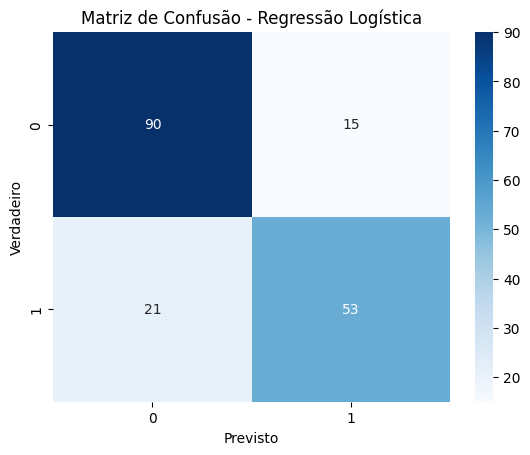


--- Resultados do Random Forest ---
Acurácia: 0.8156

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



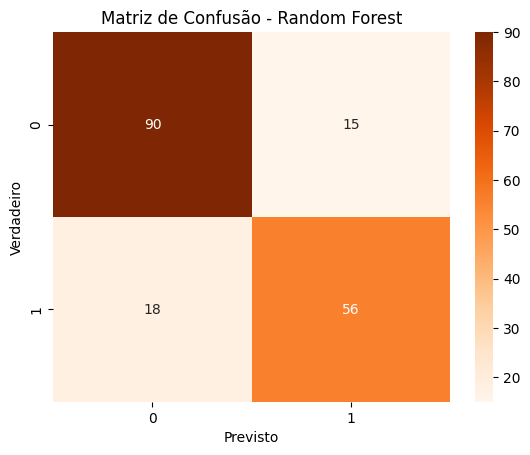

In [4]:
# Fazer previsões com ambos os modelos
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

#Avaliação da Regressão Logística
print("\n--- Resultados da Regressão Logística ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr))

# Matriz de Confusão
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()


#Avaliação do Random Forest
print("\n--- Resultados do Random Forest ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

# Matriz de Confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.title('Matriz de Confusão - Random Forest')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()